In [1]:
import copy    
import Medidas
import PSO
import pandas as pd
import warnings
import time

from PID import PID

warnings.filterwarnings('ignore')

In [2]:
def sistema2df(sistema,path):
    iteracao = list()
    feature = list()
    passarinho = 0

    columns = ["P","I","D","P_pbest","I_pbest","D_pbest","P_gbest","I_gbest","D_gbest","V_p","V_i","V_d","erro","erro_gbest","I"]

    for passarinho in range(10):
        iteracao = list()
        for iter in range(len(sistema)):
            feature = list()

            feature.append(copy.deepcopy(sistema[iter][passarinho].X[0]))
            feature.append(sistema[iter][passarinho].X[1])
            feature.append(sistema[iter][passarinho].X[2])
            feature.append(sistema[iter][passarinho].pbest[0])
            feature.append(sistema[iter][passarinho].pbest[1])
            feature.append(sistema[iter][passarinho].pbest[2])
            feature.append(sistema[iter][passarinho].gbest[0])
            feature.append(sistema[iter][passarinho].gbest[1])
            feature.append(sistema[iter][passarinho].gbest[2])
            feature.append(sistema[iter][passarinho].V[0])
            feature.append(sistema[iter][passarinho].V[1])
            feature.append(sistema[iter][passarinho].V[2])
            feature.append(sistema[iter][passarinho].erro)
            feature.append(sistema[iter][passarinho].erro_gbest)
            feature.append(sistema[iter][passarinho].I)
            
            iteracao.append(feature)
        
        df = pd.DataFrame(iteracao, columns=columns)
        new_path = path + "/passarinho" + str(passarinho) + ".xlsx"
        df.to_excel(new_path)

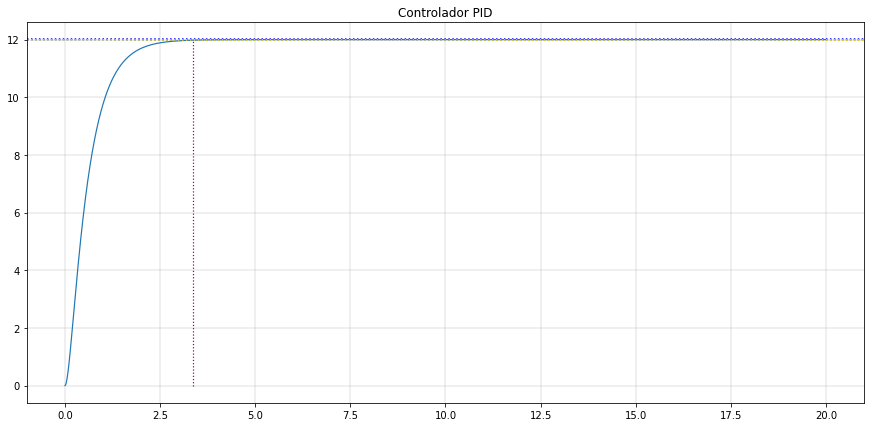

3.630134105682373
0.023775815963745117


In [3]:
ini = time.time()
num = [200, 1200]
den = [1, 17, 80, 100]
set_point = 1.0
erro = list()
pid_param = list()

pid_param.append(num)
pid_param.append(den)
pid_param.append(set_point)
ini = time.time()
pid = PID(pid_param[0],pid_param[1])
pidt = time.time() - ini

aerr = time.time()
Yma, _, T = pid.resposta_MA()
erro.append(Medidas.Tempo_Acomodacao(Yma, T))
erro.append(Medidas.Overshoot(Yma))
derr = time.time() - aerr


pid.plot_MA(Yma, T, erro)


print(pidt)
print(derr)

<- particulas geradas aleatóriamente ->
particula aleatoria [0.4449570290979906, 0.4679526017952088, 0.7536795456808955]
particula aleatoria [0.5312339359660222, 0.6821380541425165, 0.20166949994249173]
particula aleatoria [1.89950136071674, 9.626085407037666, 3.470010099095854]
particula aleatoria [5.501433767532219, 5.4136693515676715, 4.93628054080254]
particula aleatoria [7.709925372291715, 9.474376540019929, 6.5289070199594015]
particula aleatoria [39.96436097492243, 45.12410789496254, 10.824676650741987]
particula aleatoria [44.24316020154056, 32.92379579526205, 10.542601993213916]
particula aleatoria [67.81984341676748, 67.28482875030087, 60.27952375821116]
particula aleatoria [61.17992035406459, 83.93088207098052, 51.423887037913204]
particula aleatoria [99.2690361216458, 74.55545555166998, 88.38274779443819]


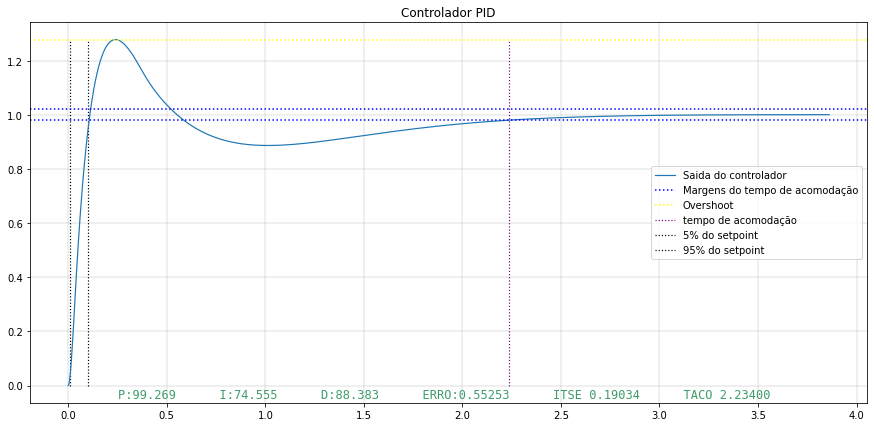

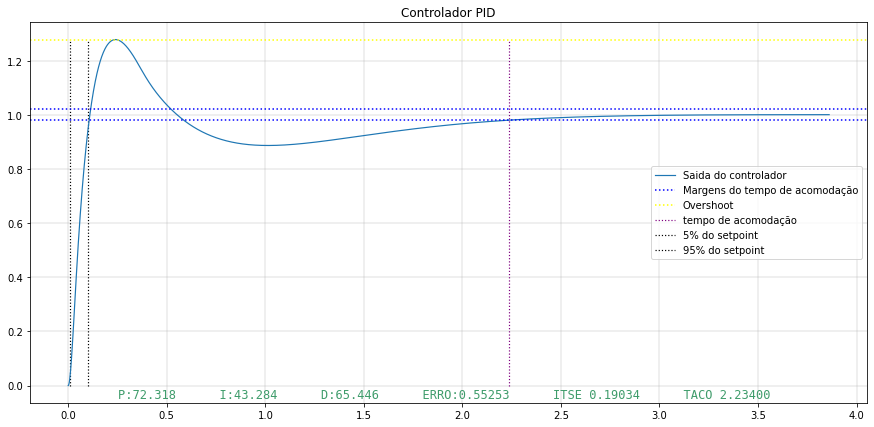

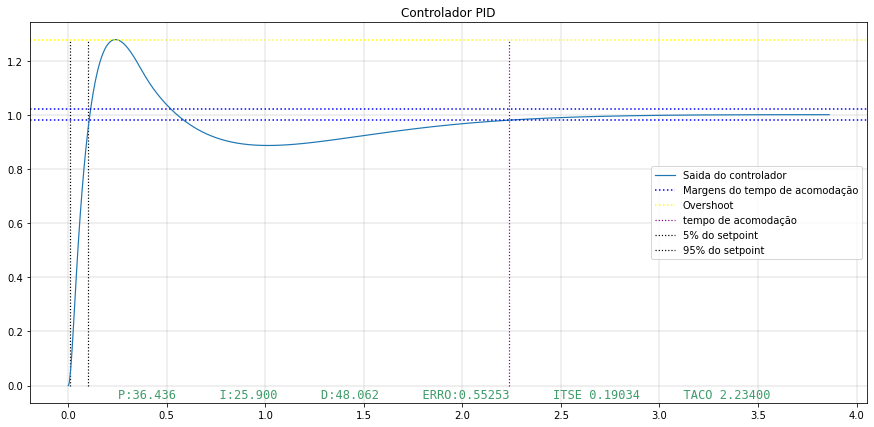

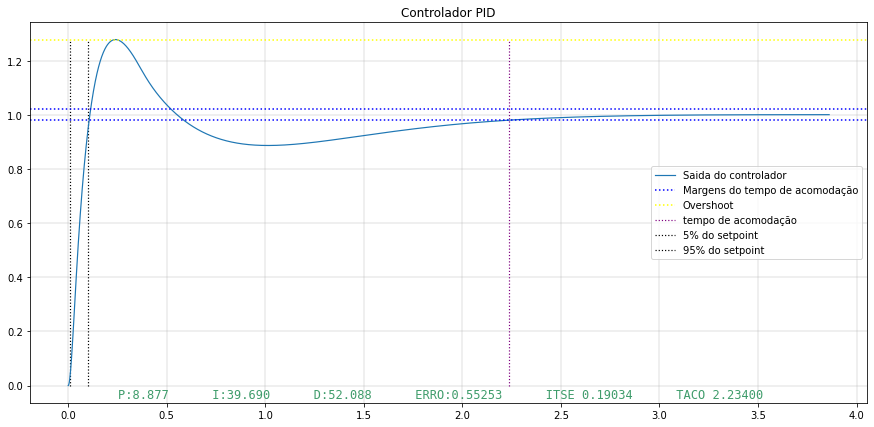

trocou


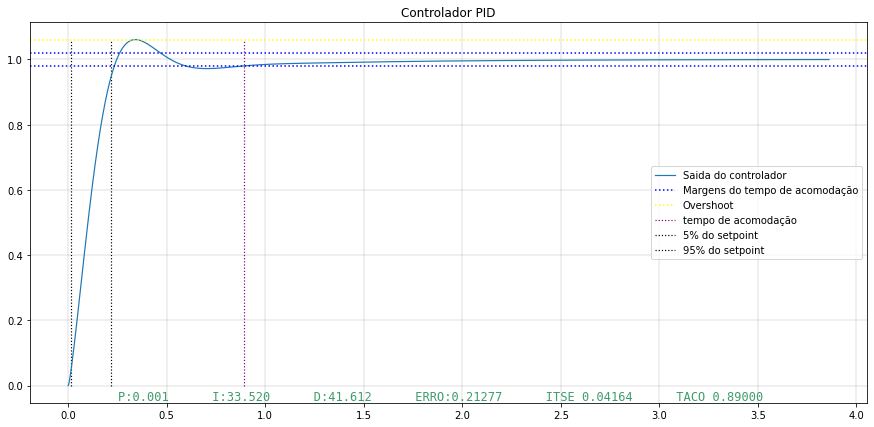

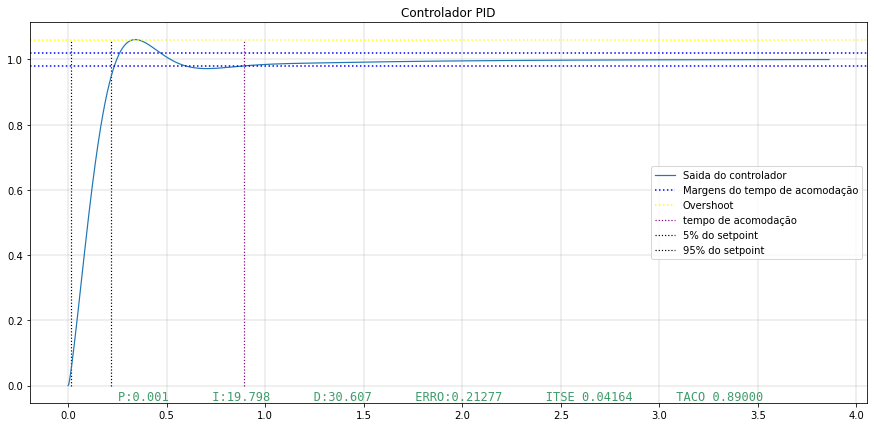

trocou


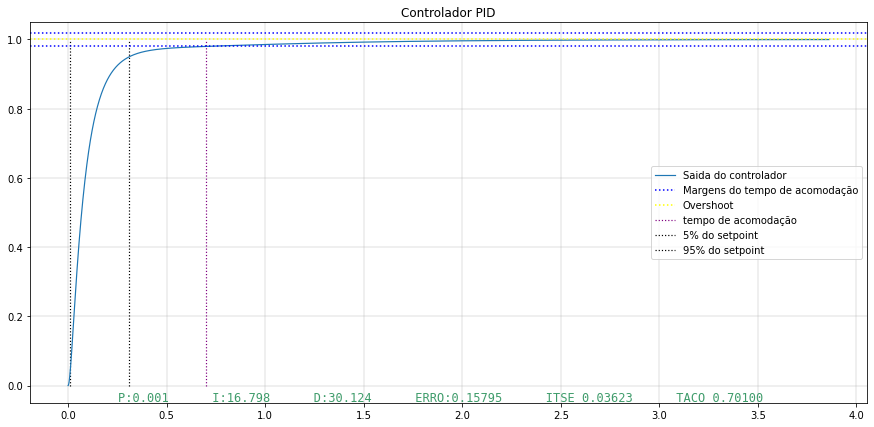

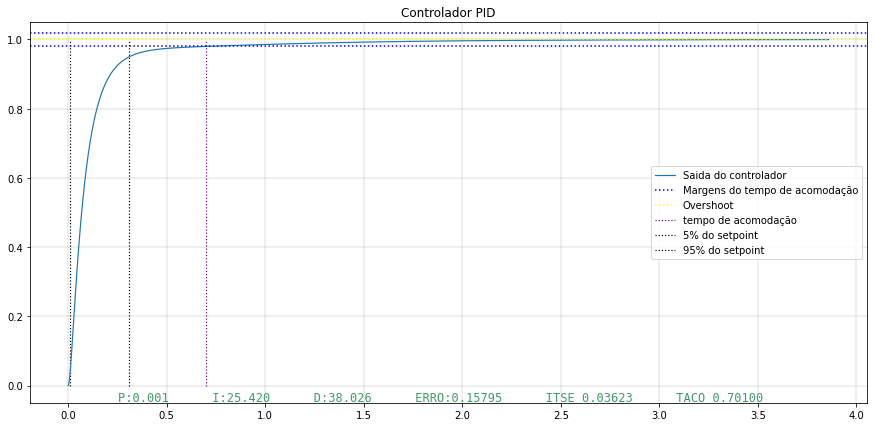

trocou


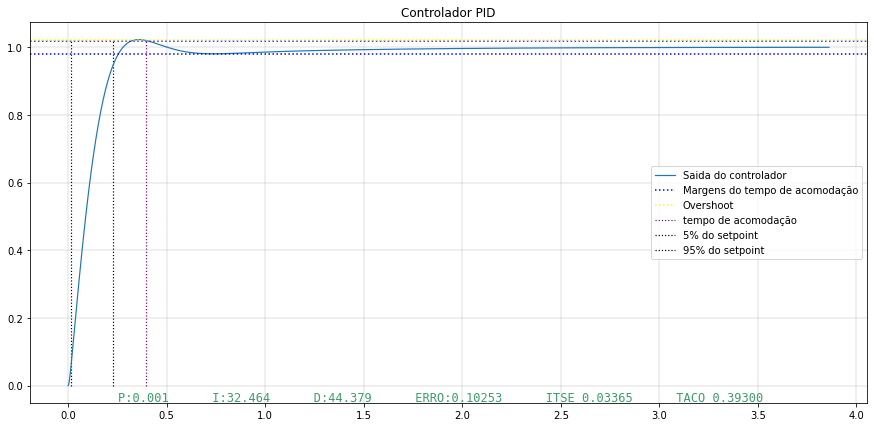

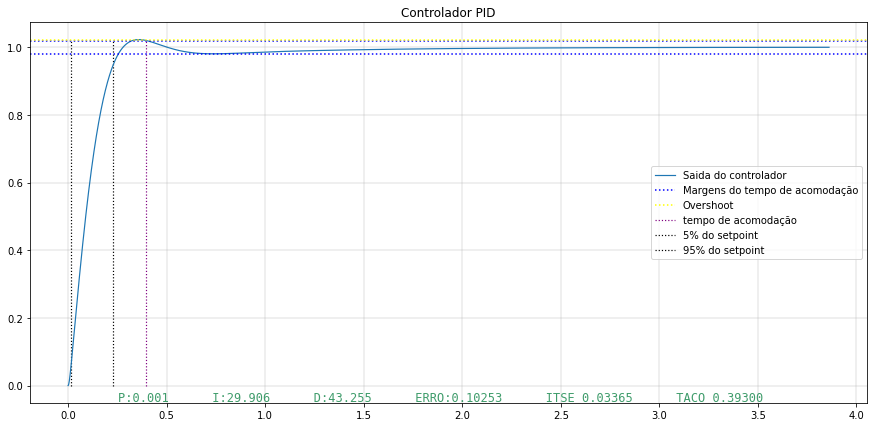

trocou


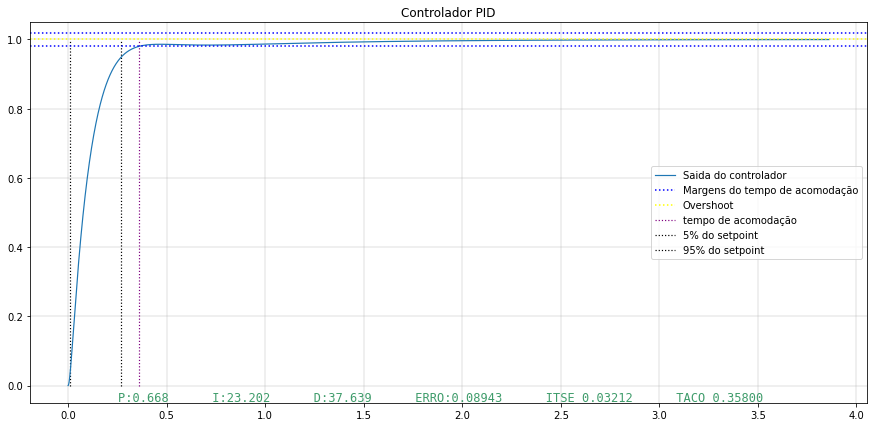

trocou


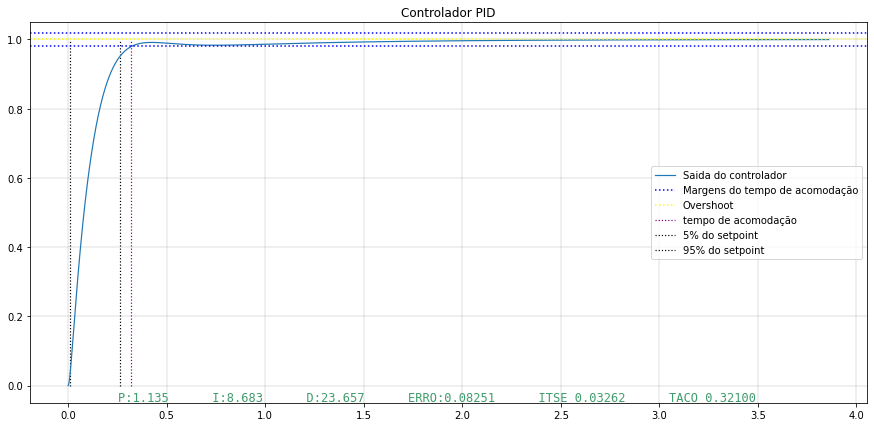

trocou


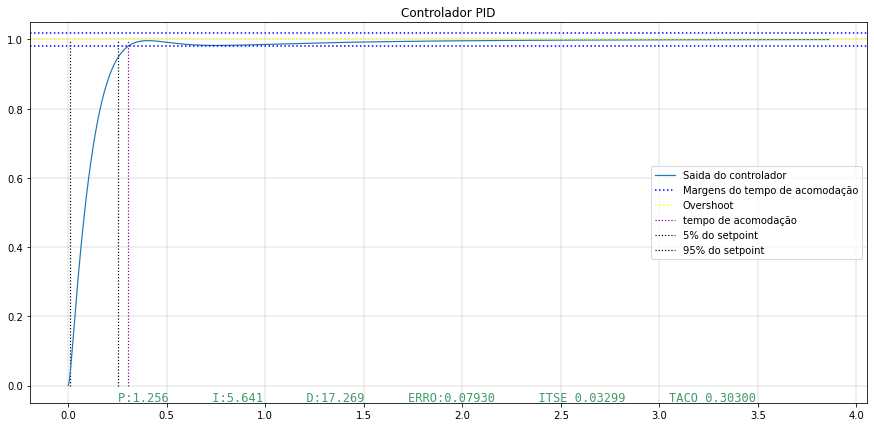

trocou


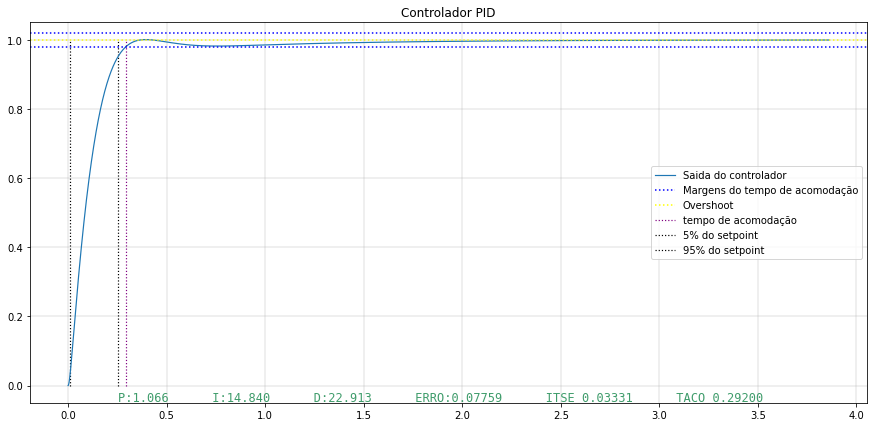

trocou


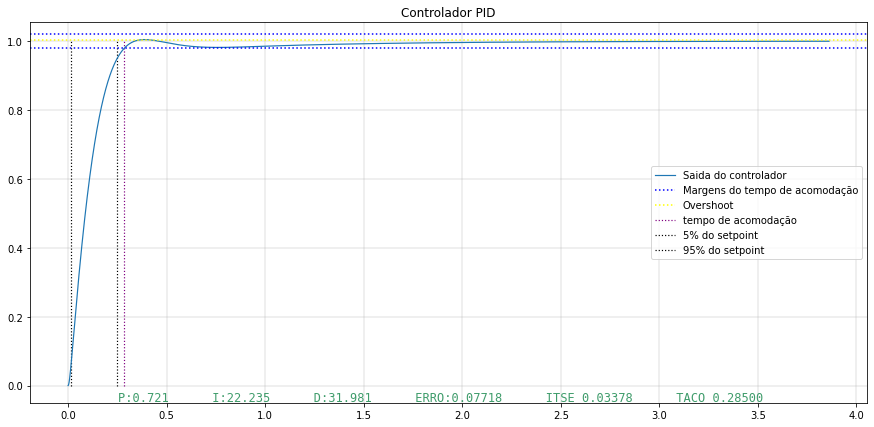

trocou


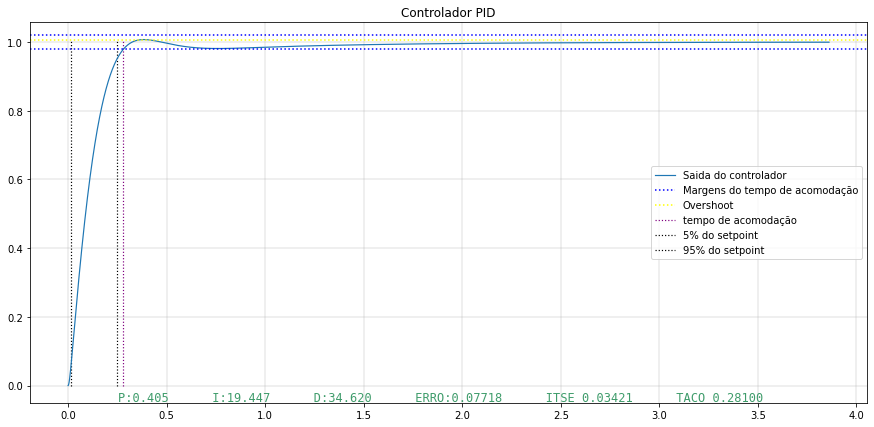

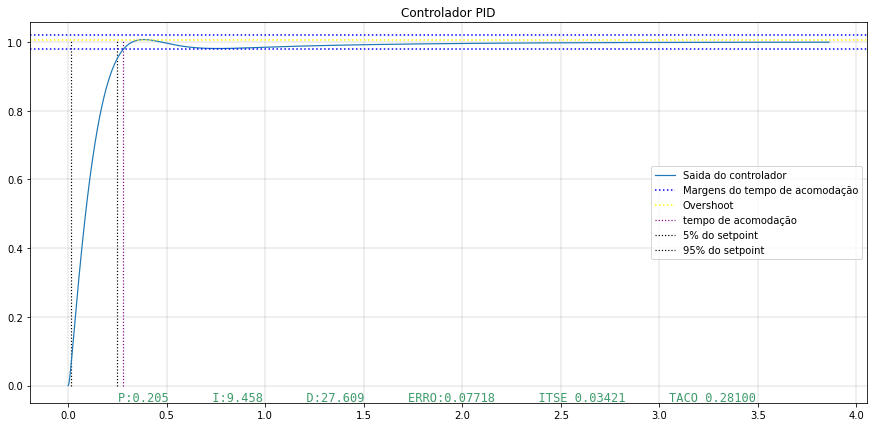

trocou


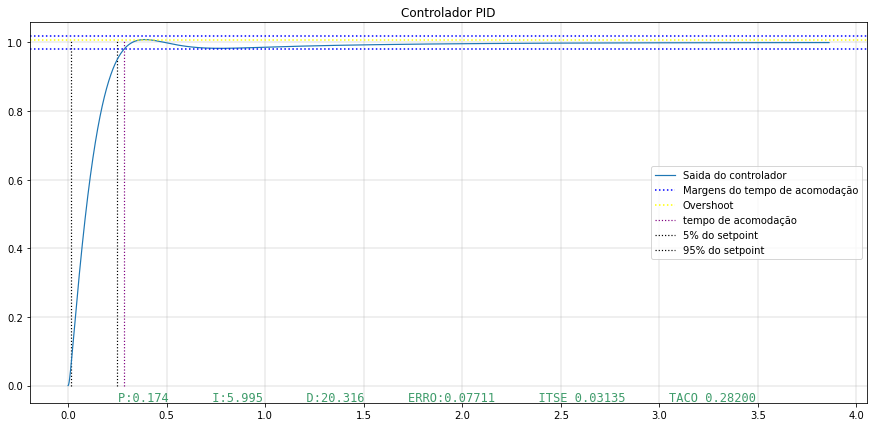

trocou


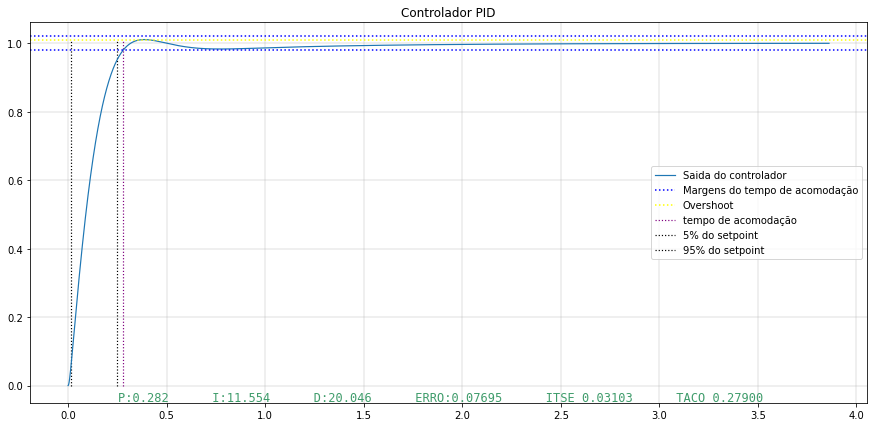

trocou


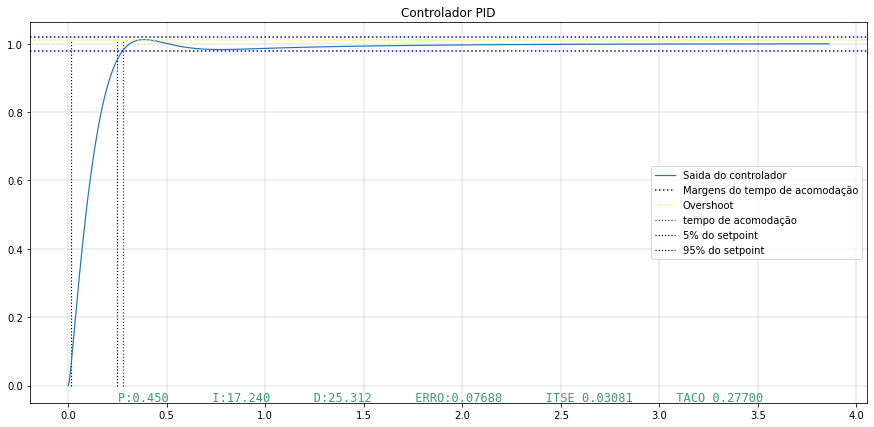

trocou


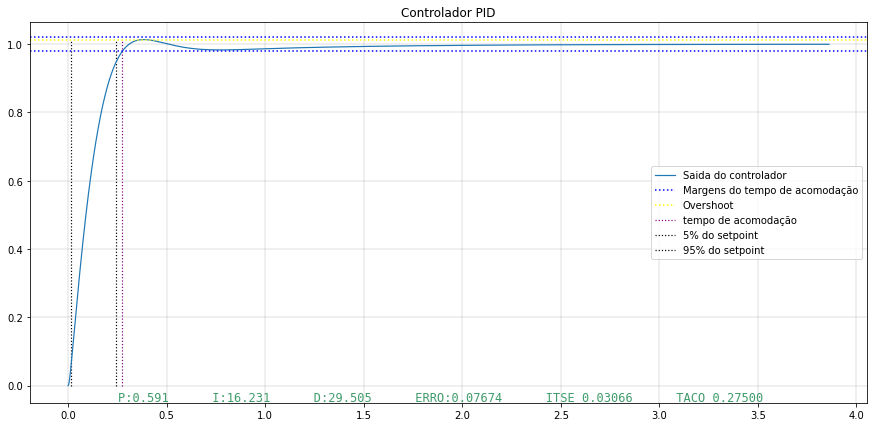

trocou


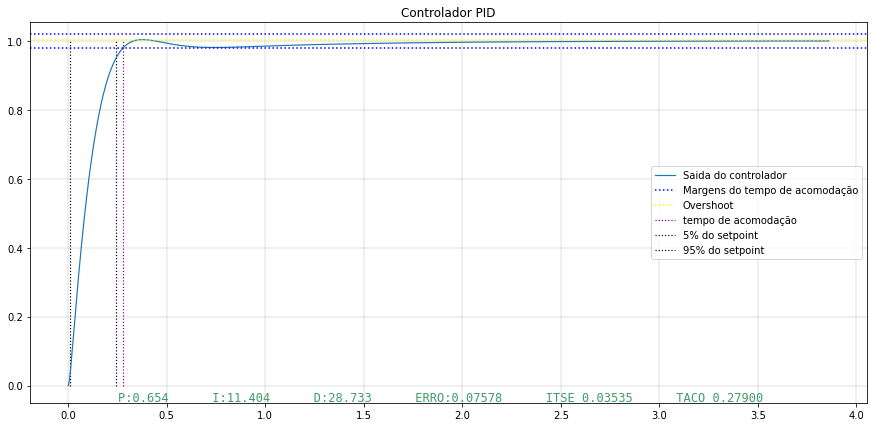

trocou


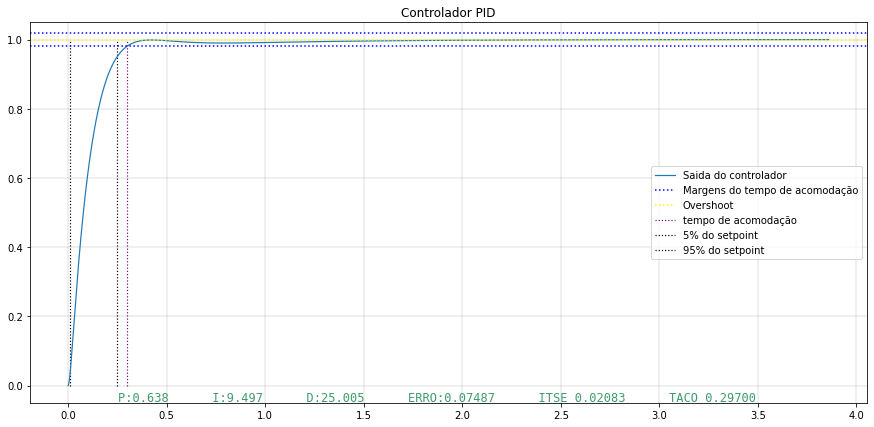

trocou


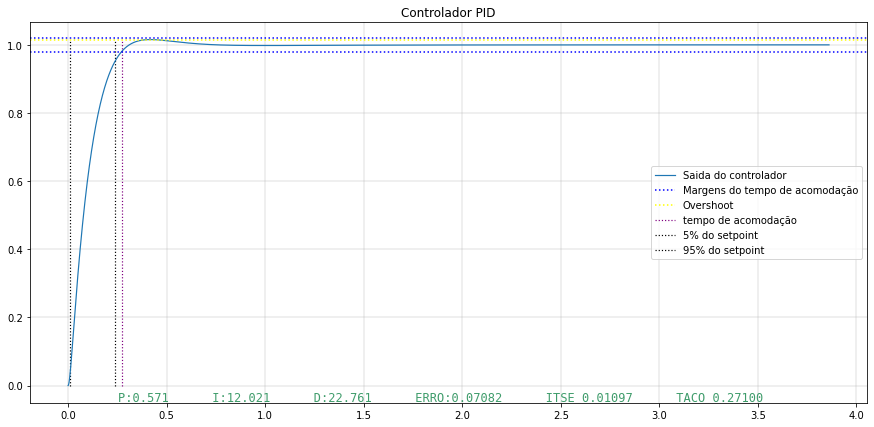

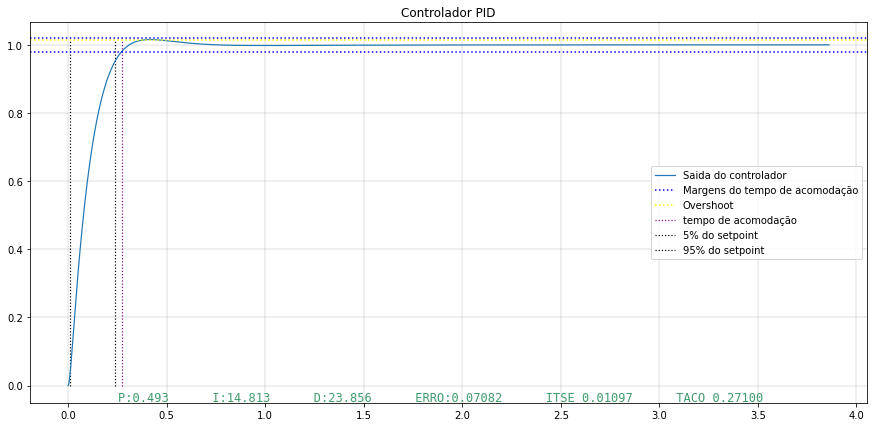

trocou


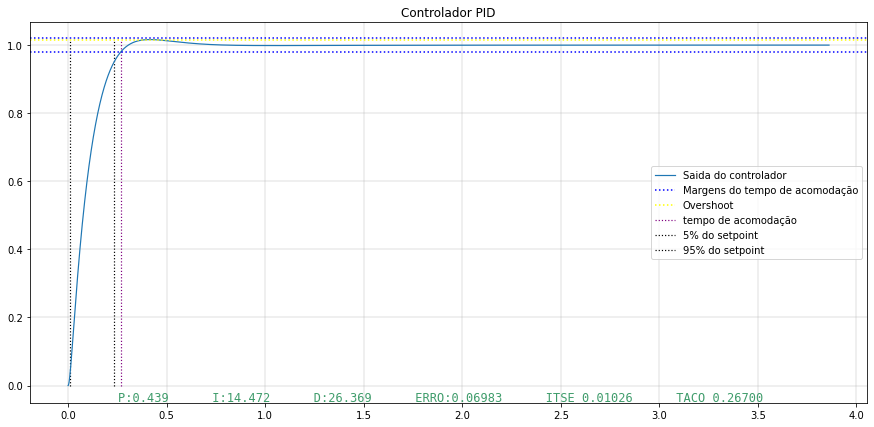

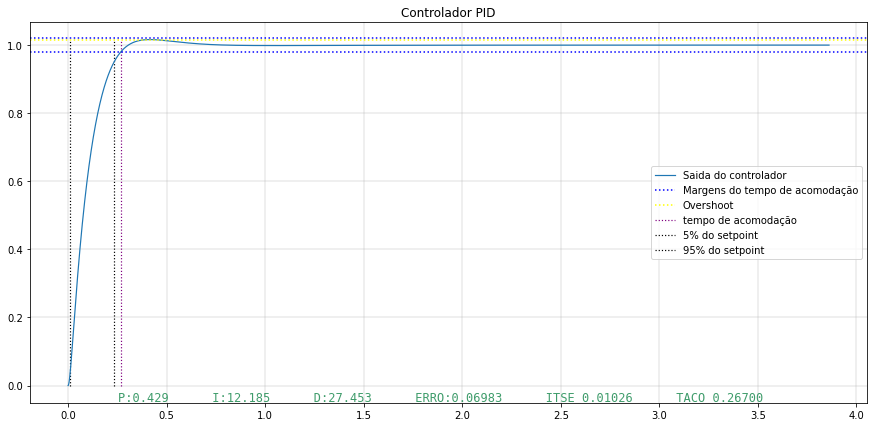

trocou


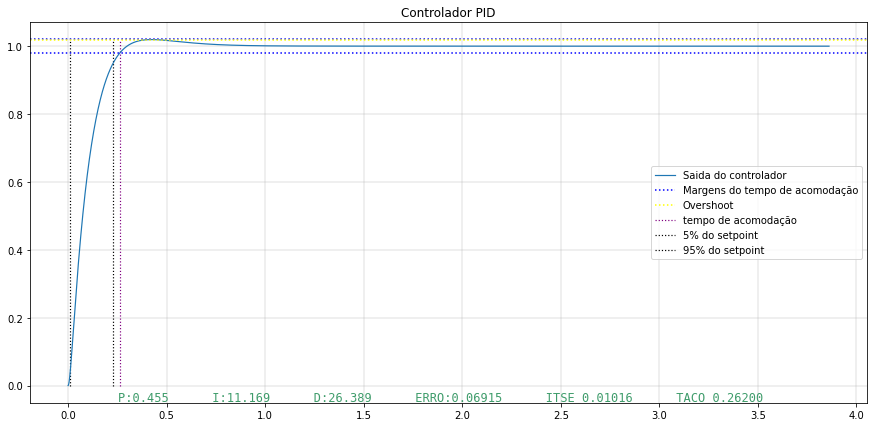

trocou


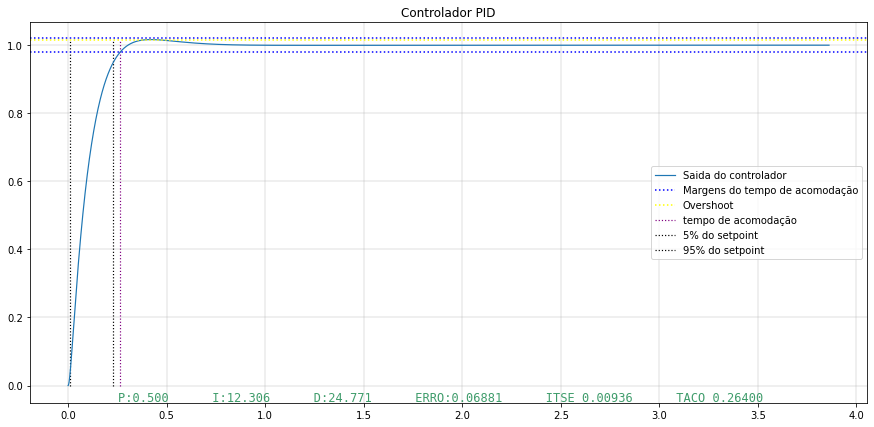

trocou


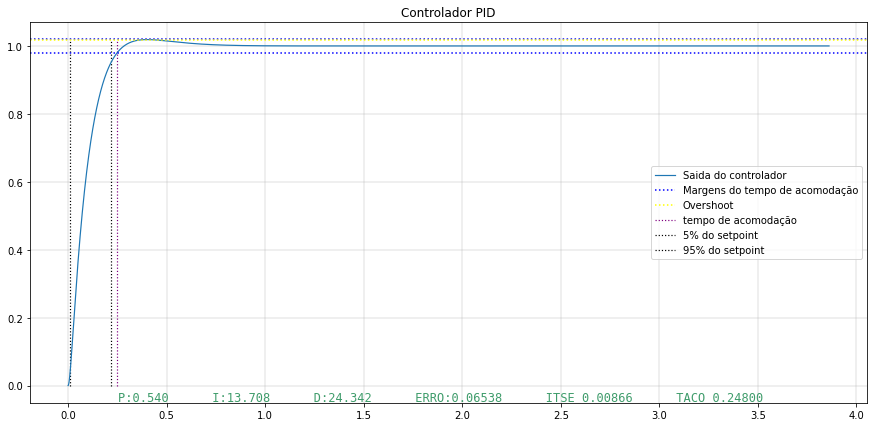

trocou


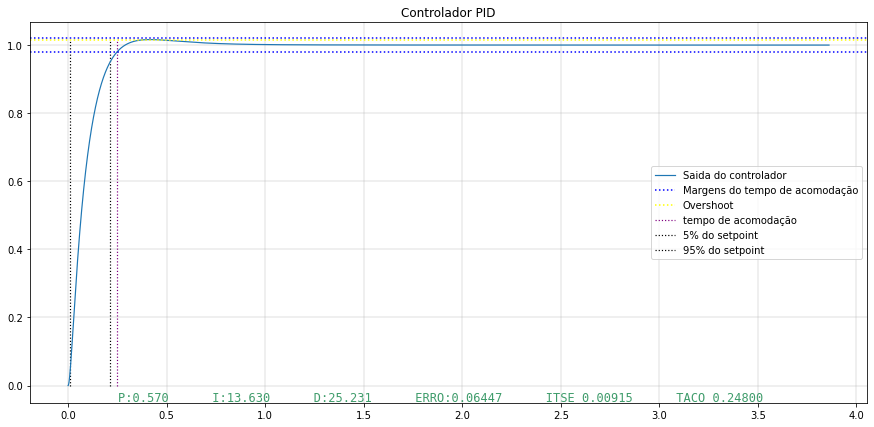

trocou


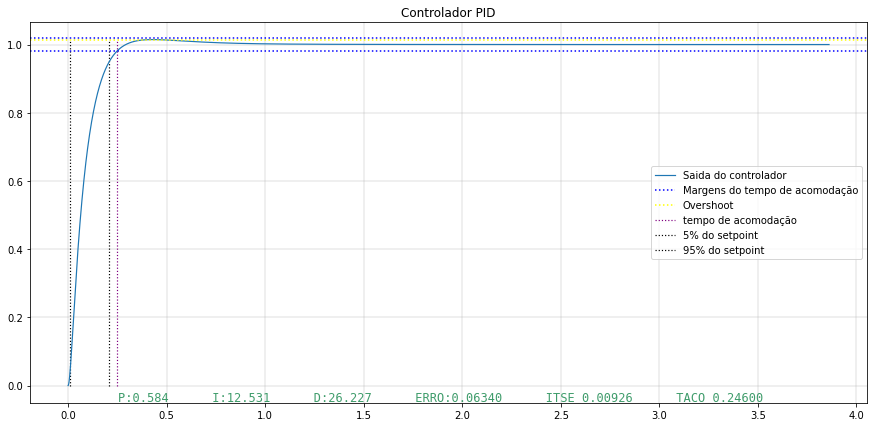

trocou


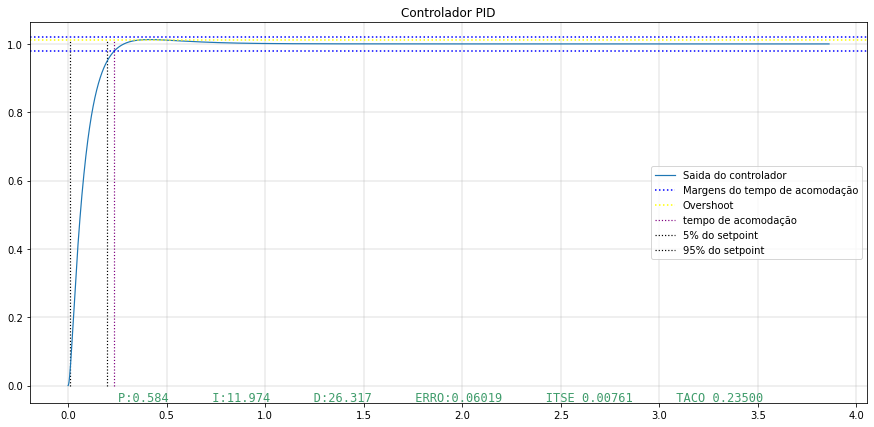

trocou


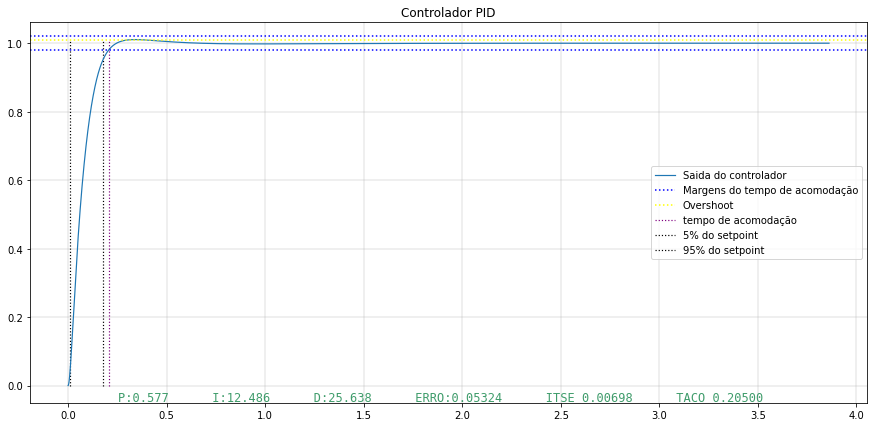

trocou


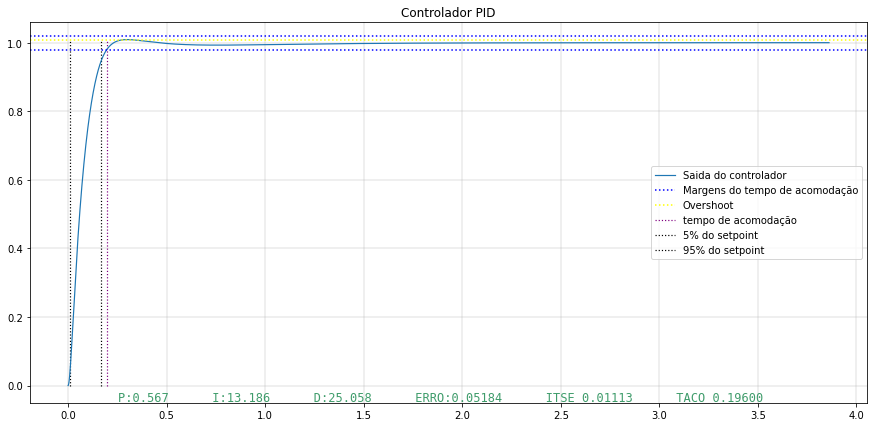

trocou


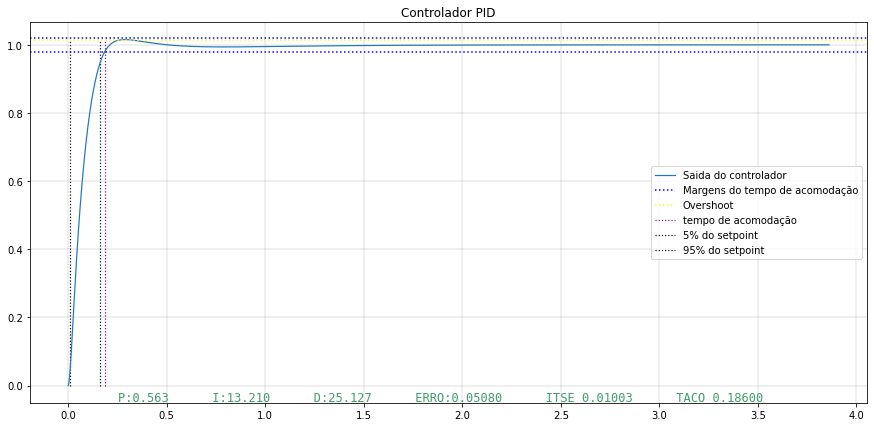

trocou


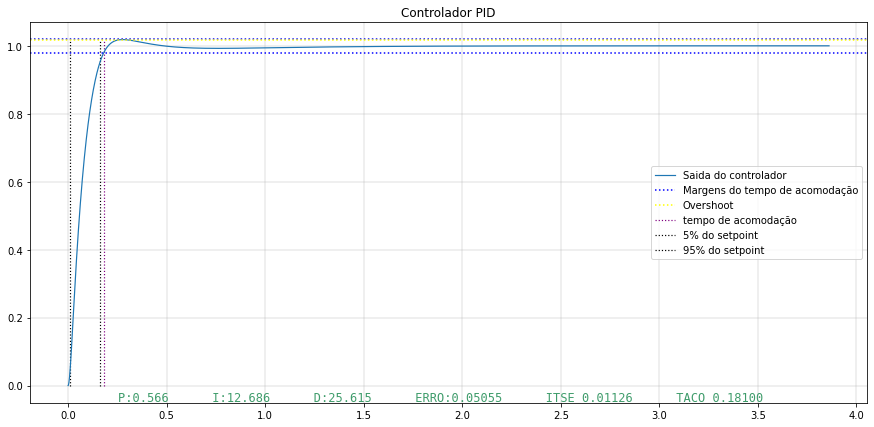

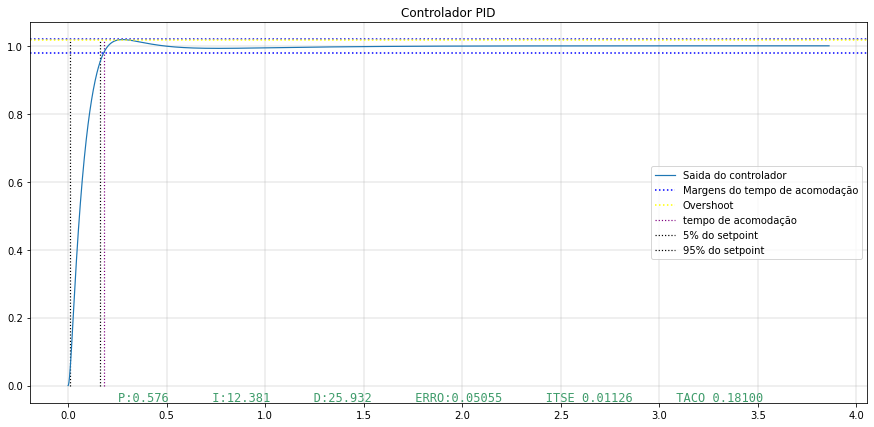

trocou


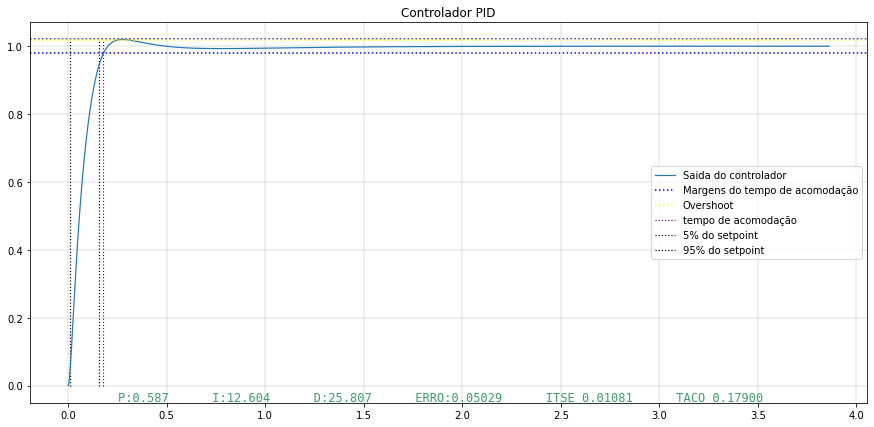

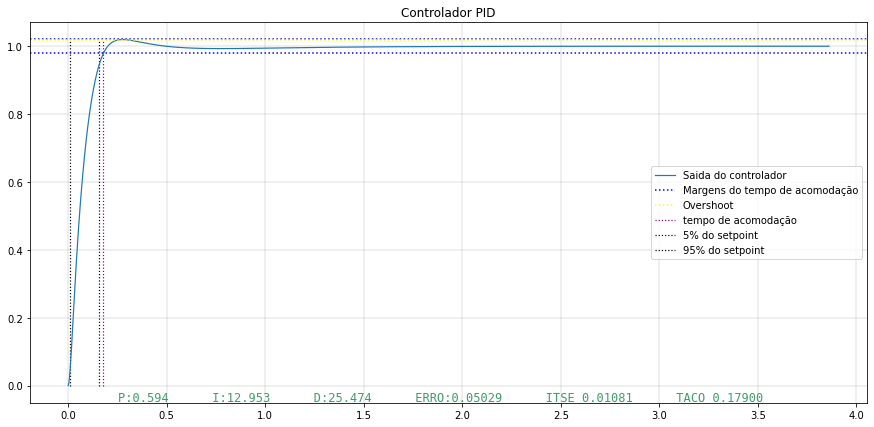

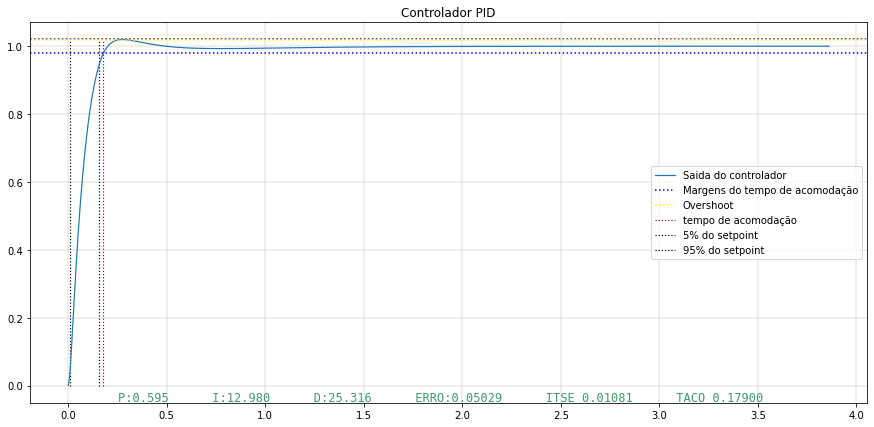

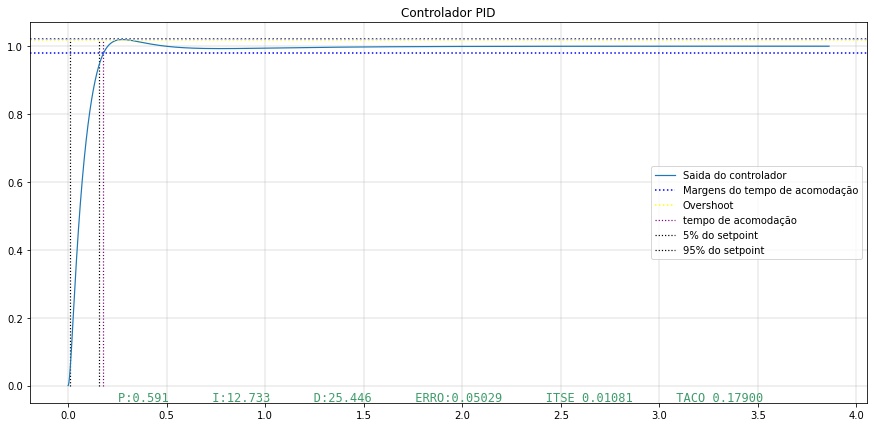

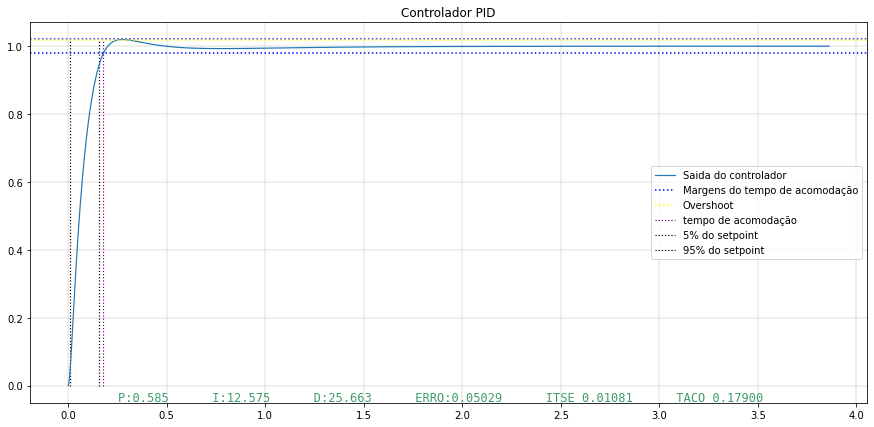

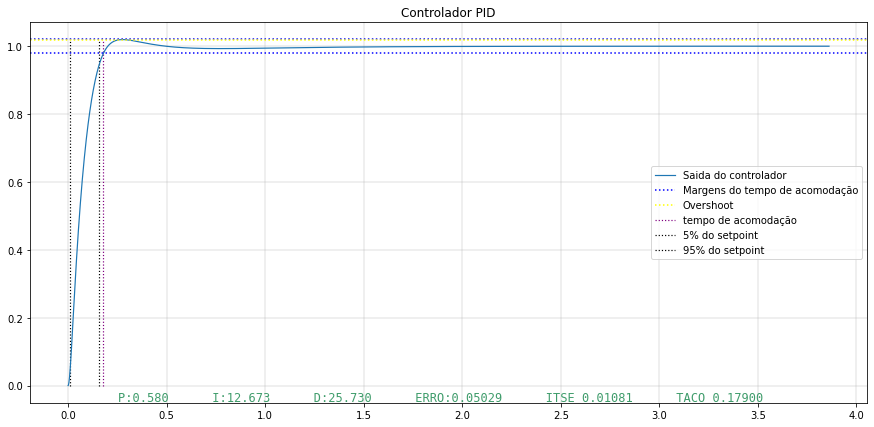

TypeError: plot_pid() missing 1 required positional argument: 'i'

In [4]:
ini = time.time()

# w = 0.75 # fator de inercia
# c1 = 1.0  # fator cognitivo
# c2 = 0.5 # fator social

w = 0.75 # fator de inercia
c1 = 1.0  # fator cognitivo
c2 = 0.6 # fator social
 
n_part = 10 # numero de particulas
parada = 0.001 # critério de parada

sistema = list()

particulas = PSO.inicializate(n_part)  

sistema = PSO.update_sistem(sistema, particulas, w, c1, c2, parada, pid)
fim = time()

print(f"< Tempo total de execução: {round((fim-ini)/60, 2)}min")

In [ ]:
sistema2df(sistema,'C:\\Users\\vitor\\Documents\\GitHub\\IC-IT\\resultados')